# #Using admz from Python

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import lanthanide as la
import cmasher as cm
from matplotlib import pyplot as plt
from carnall import bill

## ##Pr : f^2

In [34]:
numE = 2
make_symmetric = True
ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]

Bkq={
(2, 0): -218,   
(4, 0): 738,
(6, 0): 679,
(2, 2): -120,
(4, 2): 431,
(4, 4): 616,
(6, 2): -921,
(6, 4): -348,
(6, 6): -788
}

if make_symmetric:
    sym_dict = {}
    for k, v in Bkq.items():
        sym_dict[k] = v
        inverse_key = (k[0], -k[1])
        if inverse_key not in Bkq.keys():
            sym_dict[inverse_key] = v
    Bkq = sym_dict


In [114]:
energies = la.lanthanide(numE,
              F2= 68878,
              F4= 50347.0,
              F6= 32901.0,
              zeta= 751.7, 
              alpha= 16.23,
              beta= -566.6,
              gamma= 1371,
              Bkq=Bkq
              )

Running lanthanide 1 91 2...
module load lapack; ./lanthanide 1 91 2
module: loading 'lapack/3.7.0'


load=1 #STATES=91 #electrons=2

Reading free-ion params ...
Loading pauli.inp ...
Reading cf params ...
1.000000 1.000000 1.000000 0.000000 0.000000 0.000000
68878.000000 50347.000000 32901.000000 751.700000
16.230000 -566.600000 1371.000000
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
0.000000 0.000000 0.000000
row0: (0,0):8809.265581, (0,1):920.640720,
row1: (1,1):-8343.848943, #--elements = 1000
#--elements = 2000
#--elements = 3000
#--elements = 4000
Using diag1 ...
Saving eigenvalues ...


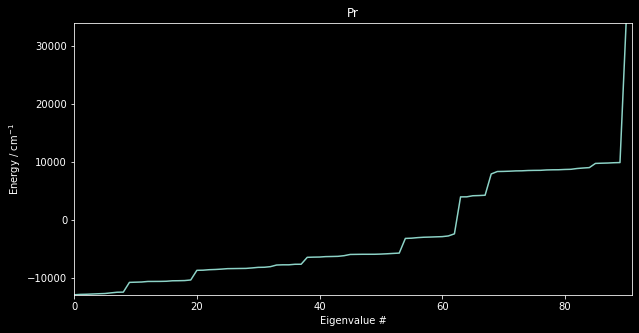

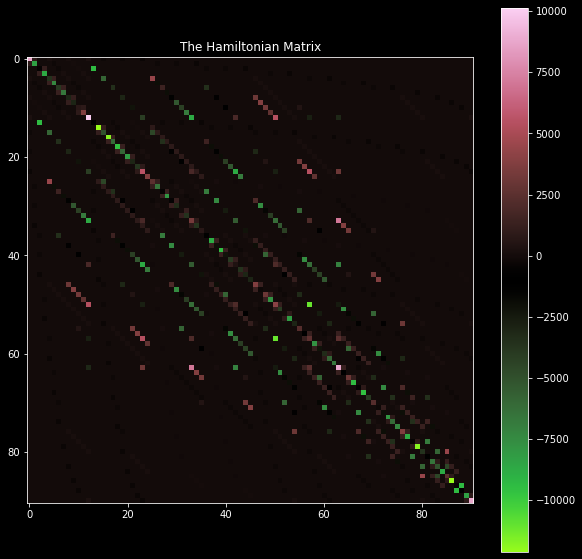

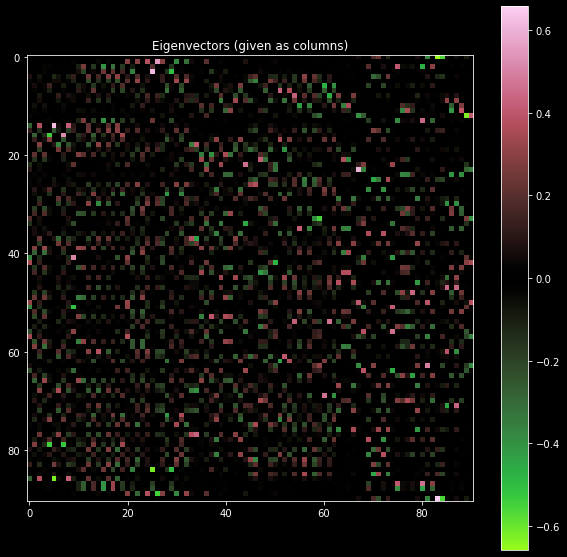

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(energies)
plt.xlabel('Eigenvalue #')
plt.ylabel('Energy / cm$^{-1}$')
plt.xlim(0, len(energies))
plt.ylim(min(energies), max(energies))
plt.title(ln)
plt.show()
the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)

plt.figure(figsize=(10,10))
plt.imshow(the_hamiltonian_matrix, cmap=cm.watermelon)
plt.colorbar()
plt.title('The Hamiltonian Matrix')
plt.show()

the_eigenvectors= la.load_gz_matrix('./f%d/eigenfunctions.gz' % numE, assume_real=True).T
plt.figure(figsize=(10,10))
plt.imshow(the_eigenvectors, cmap=cm.watermelon)
plt.colorbar()
plt.title('Eigenvectors (given as columns)')
plt.show()

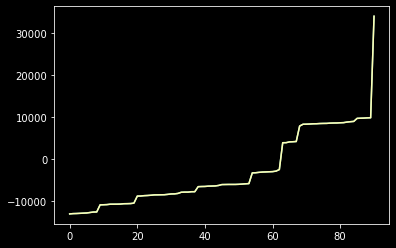

In [125]:
eigen_energies = np.sort(np.linalg.eigvalsh(the_hamiltonian_matrix))
plt.figure()
plt.plot(eigen_energies)
plt.plot(energies)
plt.show()

## ##Nd: f^3

In [21]:
def from_string_to_standard_Bqk(aDict):
    newDict = {}
    for k, v in aDict.items():
        if not (k[0] == 'B'):
            continue
        newDict[(int(k[2]), int(k[1]))] = v
    return newDict
def from_dict_to_free_ion_params(aDict):
    goodKeys = ['F2', 'F4', 'F6', 'zeta', 'alpha', 'beta', 'gamma']
    newDict = {}
    for k, v in aDict.items():
        if k in goodKeys:
            newDict[k] = v
    return newDict

In [22]:
numE = 3
make_symmetric = True
ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]

Bkq = from_string_to_standard_Bqk(bill[ln])

free_ion_params = from_dict_to_free_ion_params(bill["Nd"])

if make_symmetric:
    sym_dict = {}
    for k, v in Bkq.items():
        sym_dict[k] = v
        inverse_key = (k[0], -k[1])
        if inverse_key not in Bkq.keys():
            sym_dict[inverse_key] = v
    Bkq = sym_dict


In [24]:
energies = la.lanthanide(numE,
              **free_ion_params,
              Bkq=Bkq
              )

Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
module: loading 'lapack/3.7.0'


load=1 #STATES=364 #electrons=3

Reading free-ion params ...
Loading pauli.inp ...
Reading cf params ...
1.000000 1.000000 1.000000 0.000000 0.000000 0.000000
73018.000000 52789.000000 35757.000000 885.300000
21.340000 -593.000000 1445.000000
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
0.000000 0.000000 0.000000
#elements = 1000
#elements = 2000
#elements = 3000
#elements = 4000
#elements = 5000
#elements = 6000
#elements = 7000
#elements = 8000
#elements = 9000
#elements = 10000
#elements = 11000
#elements = 12000
#elements = 13000
#elements = 14000
#elements = 15000
#elements = 16000
#elements = 17000
#elements = 18000
#elements = 19000
#elements = 20000
#elements = 21000
#elements = 22000
#elements = 23000
#elements = 24000
#elements = 25000
#elements = 26000
#elements = 27000
#elements = 28000
#elements = 29000
#elements = 30000
#elements = 31000
#elements = 32000
#elem

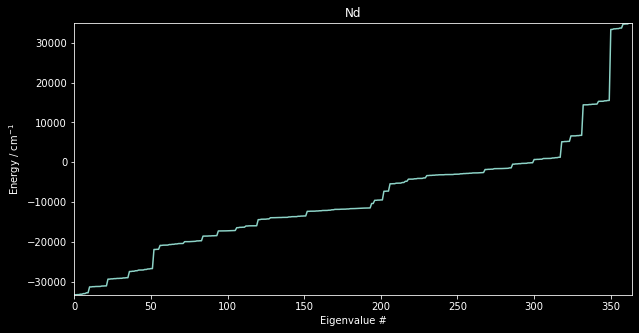

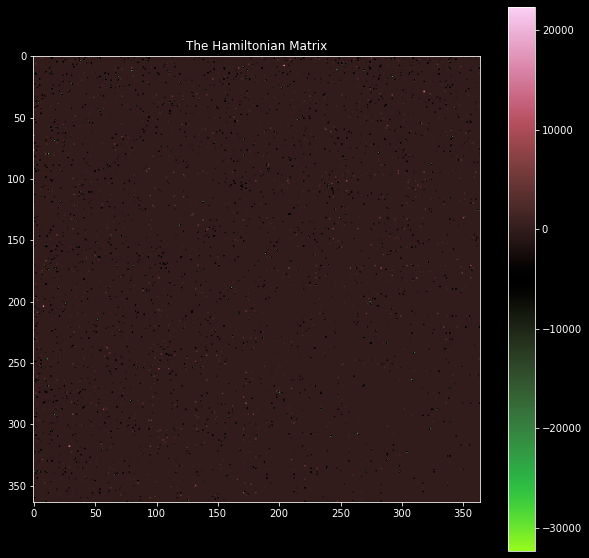

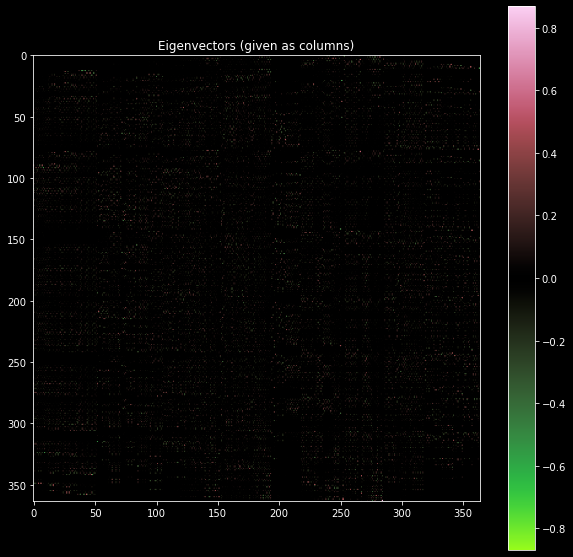

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(energies)
plt.xlabel('Eigenvalue #')
plt.ylabel('Energy / cm$^{-1}$')
plt.xlim(0, len(energies))
plt.ylim(min(energies), max(energies))
plt.title(ln)
plt.show()
the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)

plt.figure(figsize=(10,10))
plt.imshow(the_hamiltonian_matrix, cmap=cm.watermelon)
plt.colorbar()
plt.title('The Hamiltonian Matrix')
plt.show()

the_eigenvectors= la.load_gz_matrix('./f%d/eigenfunctions.gz' % numE, assume_real=True).T
plt.figure(figsize=(10,10))
plt.imshow(the_eigenvectors, cmap=cm.watermelon)
plt.colorbar()
plt.title('Eigenvectors (given as columns)')
plt.show()

In [28]:
eigen_energies = np.linalg.eigvals(the_hamiltonian_matrix)
eigen_energies = np.sort(eigen_energies)
eigen_energies = eigen_energies - eigen_energies[0]

In [7]:
energies = la.lanthanide(numE,
              **free_ion_params,
              Bkq=Bkq
              )

Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
module: loading 'lapack/3.7.0'


load=1 #STATES=364 #electrons=3

Reading free-ion params ...
Loading pauli.inp ...
Reading cf params ...
1.000000 1.000000 1.000000 0.000000 0.000000 0.000000
73018.000000 52789.000000 35757.000000 885.300000
21.340000 -593.000000 1445.000000
0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
0.000000 0.000000 0.000000
#elements = 1000
#elements = 2000
#elements = 3000
#elements = 4000
#elements = 5000
#elements = 6000
#elements = 7000
#elements = 8000
#elements = 9000
#elements = 10000
#elements = 11000
#elements = 12000
#elements = 13000
#elements = 14000
#elements = 15000
#elements = 16000
#elements = 17000
#elements = 18000
#elements = 19000
#elements = 20000
#elements = 21000
#elements = 22000
#elements = 23000
#elements = 24000
#elements = 25000
#elements = 26000
#elements = 27000
#elements = 28000
#elements = 29000
#elements = 30000
#elements = 31000
#elements = 32000
#elem

In [8]:
energies = np.sort(energies)
grounded_energies = energies - energies[0]

In [9]:
list(grounded_energies[::2])

[0.0,
 43.996932000001834,
 148.6983739999996,
 299.4899549999973,
 508.34773300000234,
 1977.0100950000015,
 2038.8055879999993,
 2082.228905,
 2101.368624999999,
 2204.9742850000002,
 2238.3824989999994,
 3933.666709000001,
 4000.705725,
 4064.3016979999993,
 4118.035458000002,
 4146.157762999999,
 4236.257890000001,
 4297.5673940000015,
 5853.332921000001,
 5920.985092999999,
 6048.254643,
 6212.884335999999,
 6234.454110999999,
 6362.029494000002,
 6493.958286000001,
 6587.591886999999,
 11389.432560000001,
 11431.299645,
 12410.642233999999,
 12468.199904000001,
 12490.360053,
 12620.983743,
 12684.810599,
 12778.928503,
 12870.205026,
 12896.025959999999,
 13346.378247,
 13350.775756,
 13374.548127000002,
 13440.786303,
 13538.725676000002,
 13575.679703000002,
 14741.352022,
 14758.628187999999,
 14791.520644,
 14826.632356999999,
 14857.185902000001,
 16036.928392000002,
 16058.999466000001,
 16063.484578,
 16080.708467,
 16111.151112,
 16149.944134000001,
 16861.224161000002,


## ##Pr: f^3 - extracting the Ts

In [ ]:
numE = 3
make_symmetric = True
ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]

Bkq={}


In [ ]:
Tindices = [2,3,4,5,7,8]
the_T_matrices = {}
for idx in Tindices:
    Tname = 'T%d' % idx
    print(Tname)
    Tees = {'T%d'%i:0. % i for i in Tindices}
    Tees[Tname] = 1.
    energies = la.lanthanide(numE,
                **Tees,
                Bkq={},
                verbose=False
                )
    the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)
    the_T_matrices[Tname] = the_hamiltonian_matrix

T2
lanthanide binary not found, compiling ...
module load lapack; gcc -O3 -o ./lanthanide ./lanthanide.c  -llapack -lblas -lm -lgfortran -lz
module: loading 'lapack/3.7.0'
lanthanide binary not found in execution directory, copying ...
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T3
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T4
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T5
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T7
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T8
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3


In [ ]:
%config InlineBackend.figure_format='retina'

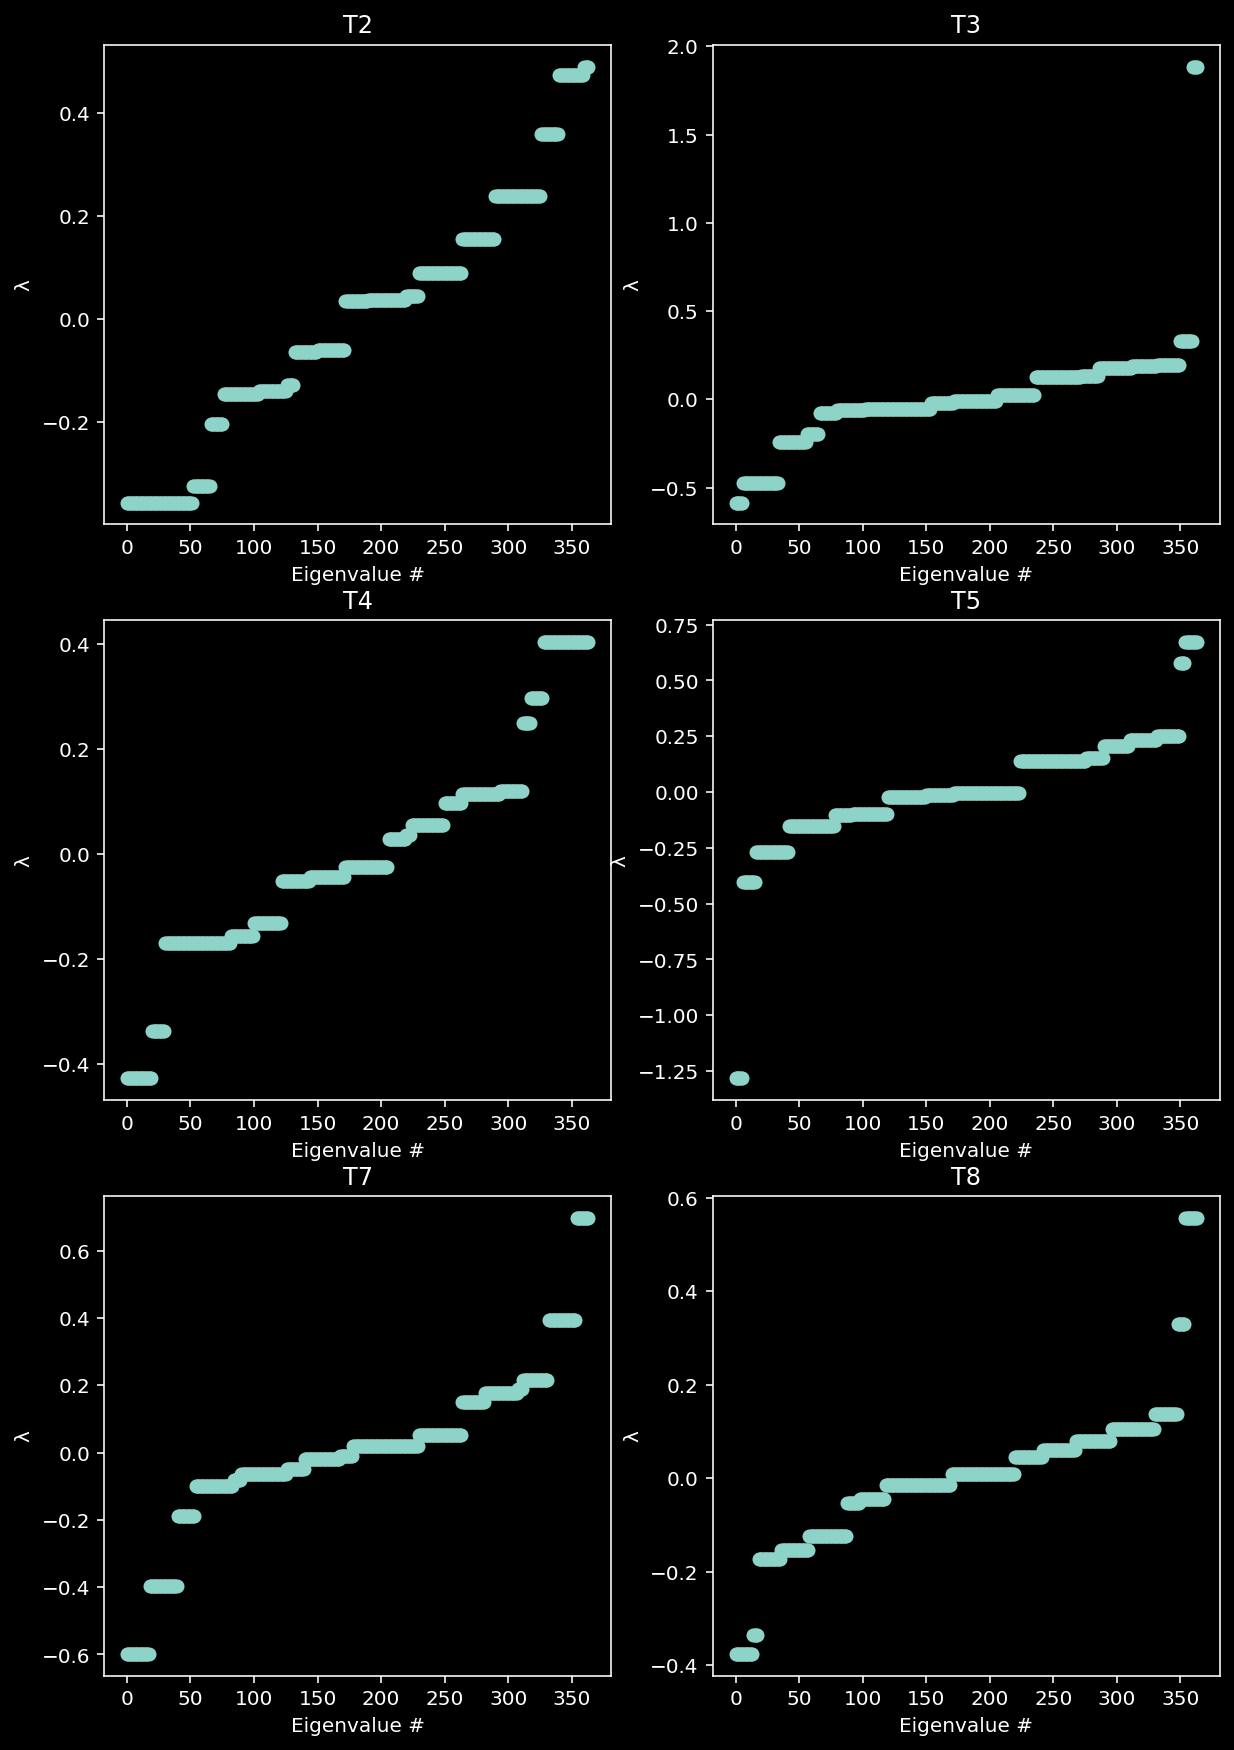

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(10,15))
for pidx, idx in enumerate(Tindices):
    ax = axes[pidx//2,pidx%2]
    Tname = 'T%d' % idx
    eivals = np.linalg.eigvalsh(the_T_matrices[Tname])
    ax.plot(eivals, 'o')
    ax.set_title(Tname)
    ax.set_xlabel('Eigenvalue #')
    ax.set_ylabel('λ')
plt.show()

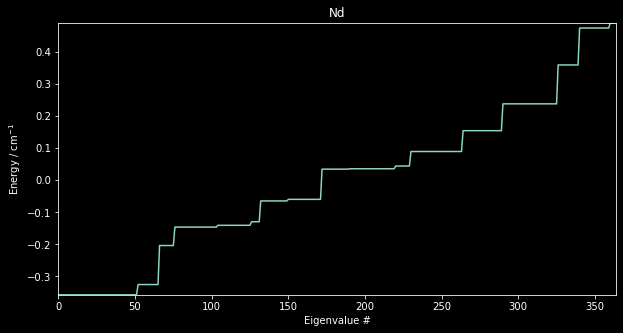

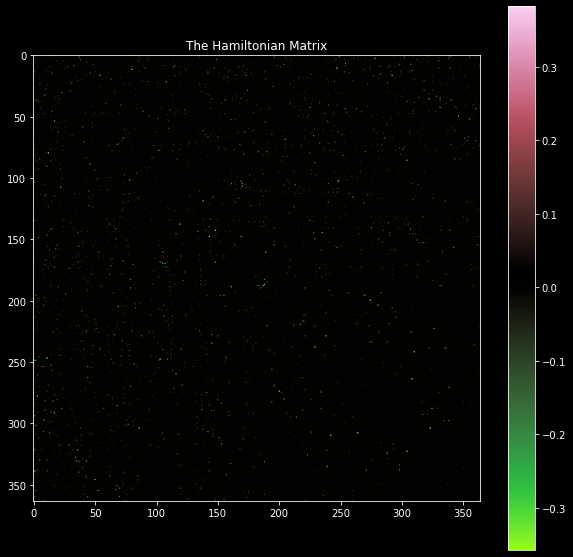

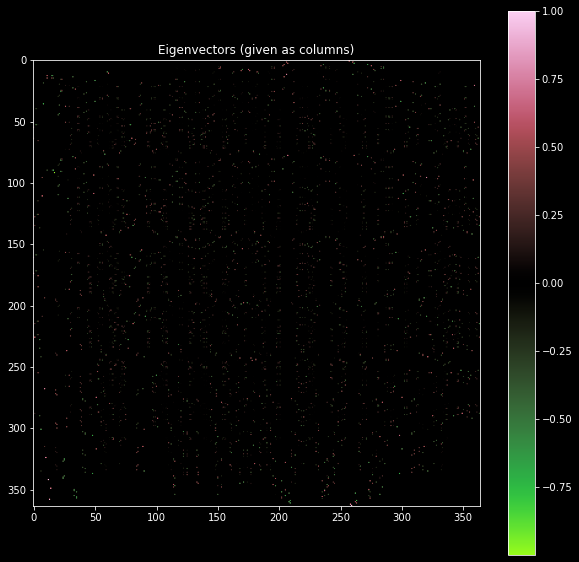

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(energies)
plt.xlabel('Eigenvalue #')
plt.ylabel('Energy / cm$^{-1}$')
plt.xlim(0, len(energies))
plt.ylim(min(energies), max(energies))
plt.title(ln)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(the_hamiltonian_matrix, cmap=cm.watermelon)
plt.colorbar()
plt.title('The Hamiltonian Matrix')
plt.show()

the_eigenvectors= la.load_gz_matrix('./f%d/eigenfunctions.gz' % numE, assume_real=True).T
plt.figure(figsize=(10,10))
plt.imshow(the_eigenvectors, cmap=cm.watermelon)
plt.colorbar()
plt.title('Eigenvectors (given as columns)')
plt.show()

## ##extracting all the Ts

In [142]:
export_matrices = {}
for numE in [3,4]:
    print(numE)
    make_symmetric = True
    ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]
    Bkq={}
    Tindices = [2,3,4,6,7,8]
    the_T_matrices = {}
    for idx in Tindices:
        Tname = 'T%d' % idx
        print(Tname)
        Tees = {'T%d'%i:0. % i for i in Tindices}
        Tees[Tname] = 1.
        energies = la.lanthanide(numE,
                    **Tees,
                    Bkq={},
                    verbose=False
                    )
        the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)
        the_T_matrices[Tname] = the_hamiltonian_matrix
    export_matrices[numE] = the_T_matrices


3
T2
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T3
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T4
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T6
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T7
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
T8
Running lanthanide 1 364 3...
module load lapack; ./lanthanide 1 364 3
4
T2
Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
T3
Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
T4
Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
T6
Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
T7
Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
T8
Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4


In [143]:
from datapipes import *

In [145]:
save_to_h5(export_matrices, 'T_matrices.h5', overwrite=True)

File already exists, overwriting ...


## ##Pm : f^4

In [168]:
numE = 4
make_symmetric = False
ln = ["Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm","Yb"][numE-1]

Bkq={
(2,  0):  -245.0,    
(2,  2): -50.0,
(2, -2): -50.0,

(4,  0):  470.0,
(4,  2):  525.0,
(4,  4):  490.0,

(4, -2): 525.0,
(4, -4): 490.0,

(6,  0): 640.0,
(6,  2): -750.0,
(6,  4): -450.0,
(6,  6):  -760.0,

(6, -2): -750.0,
(6, -4): -450.0,
(6, -6): -760.0
}

if make_symmetric:
    sym_dict = {}
    for k, v in Bkq.items():
        sym_dict[k] = v
        inverse_key = (k[0], -k[1])
        if inverse_key not in Bkq.keys():
            sym_dict[inverse_key] = v
    Bkq = sym_dict


Running lanthanide 1 1001 4...
module load lapack; ./lanthanide 1 1001 4
module: loading 'lapack/3.7.0'


load=1 #STATES=1001 #electrons=4

Reading free-ion params ...
Loading pauli.inp ...
Reading cf params ...
1.000000 1.000000 1.000000 0.000000 0.000000 0.000000
76400.000000 54900.000000 37700.000000 1025.000000
20.500000 -560.000000 1475.000000
300.000000 35.000000 58.000000 -310.000000 350.000000 320.000000
0.000000 0.000000 0.000000
#elements = 1000
#elements = 2000
#elements = 3000
#elements = 4000
#elements = 5000
#elements = 6000
#elements = 7000
#elements = 8000
#elements = 9000
#elements = 10000
#elements = 11000
#elements = 12000
#elements = 13000
#elements = 14000
#elements = 15000
#elements = 16000
#elements = 17000
#elements = 18000
#elements = 19000
#elements = 20000
#elements = 21000
#elements = 22000
#elements = 23000
#elements = 24000
#elements = 25000
#elements = 26000
#elements = 27000
#elements = 28000
#elements = 29000
#elements = 30000
#elements = 31000
#element

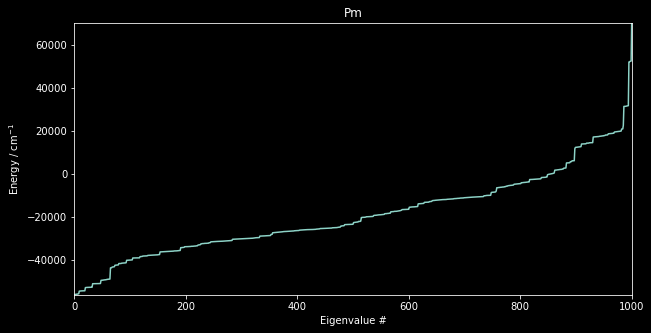

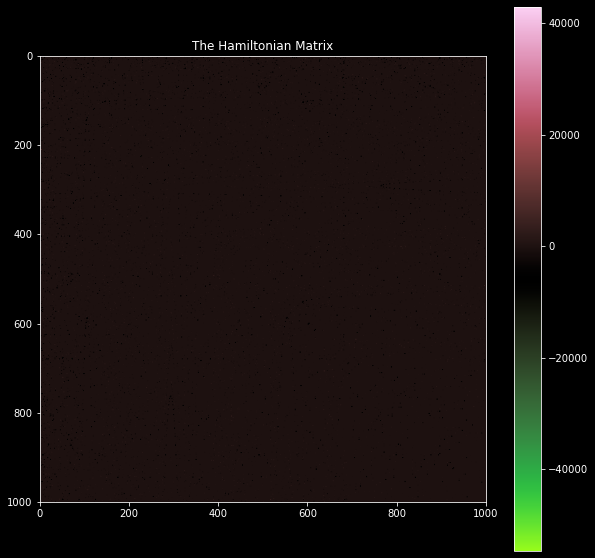

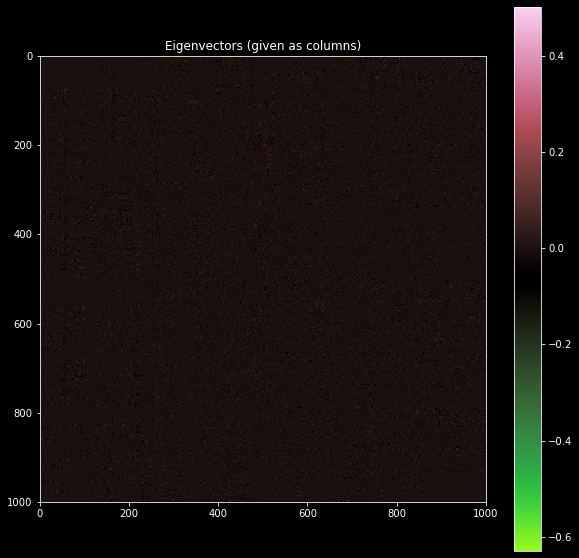

In [169]:
energies = la.lanthanide(numE, F2=76400, F4=54900.0, F6=37700.0, zeta=1025.0, 
              alpha=20.5, beta=-560, gamma=1475.0,
              T2=300.0, T3=35.0, T4=58.0, T5=-310.0, T7=350.0, T8=320.0,
              Bkq=Bkq
              )
plt.figure(figsize=(10, 5))
plt.plot(energies)
plt.xlabel('Eigenvalue #')
plt.ylabel('Energy / cm$^{-1}$')
plt.xlim(0, len(energies))
plt.ylim(min(energies), max(energies))
plt.title(ln)
plt.show()
the_hamiltonian_matrix = la.load_gz_matrix('./f%d/matrix.gz' % numE, upper_triangular=True, assume_real=True)

plt.figure(figsize=(10,10))
plt.imshow(the_hamiltonian_matrix, cmap=cm.watermelon)
plt.colorbar()
plt.title('The Hamiltonian Matrix')
plt.show()

the_eigenvectors= la.load_gz_matrix('./f%d/eigenfunctions.gz' % numE, assume_real=True).T
plt.figure(figsize=(10,10))
plt.imshow(the_eigenvectors, cmap=cm.watermelon)
plt.colorbar()
plt.title('Eigenvectors (given as columns)')
plt.show()